In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
%matplotlib inline

In [64]:
m_df = pd.read_csv("/Users/tural/Datasets/ml-20m/movies.csv")
m_df.set_index("movieId", inplace=True)
m_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [65]:
r_df = pd.read_csv("/Users/tural/Datasets/ml-20m/ratings.csv")
r_df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [66]:
avg_rating_per_movie = r_df[["movieId", "rating"]].groupby("movieId").rating.mean().sort_values(ascending=False)

In [67]:
for movie_id, score in avg_rating_per_movie.head(10).iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Divorce (1945) : 5.0
Summer Wishes, Winter Dreams (1973) : 5.0
The Beautiful Story (1992) : 5.0
Sierra, La (2005) : 5.0
A Night for Dying Tigers (2010) : 5.0
The House on 56th Street (1933) : 5.0
Such Hawks Such Hounds (2008) : 5.0
Story of Science, The (2010) : 5.0
De la servitude moderne (2009) : 5.0
Small Roads (2011) : 5.0


# Амортизирующее среднее

In [102]:
mu = r_df.rating.mean()
mu

3.5255285642993797

In [103]:
k = 100

In [104]:
sum_rating_per_movie = r_df[["movieId", "rating"]].groupby("movieId").rating.sum() + k * mu

In [105]:
cnt_rating_per_movie = r_df[["movieId", "rating"]].groupby("movieId").rating.count() + k

In [106]:
savg_rating_per_movie = (sum_rating_per_movie / cnt_rating_per_movie).sort_values(ascending=False)

In [107]:
for movie_id, score in savg_rating_per_movie.head(10).iteritems():
    print(m_df.loc[movie_id].title, ":", score)

Shawshank Redemption, The (1994) : 4.44553860108
Godfather, The (1972) : 4.3627078243
Usual Suspects, The (1995) : 4.33265513642
Schindler's List (1993) : 4.30861053668
Godfather: Part II, The (1974) : 4.27291267934
Seven Samurai (Shichinin no samurai) (1954) : 4.26778694018
Rear Window (1954) : 4.26708375728
Casablanca (1942) : 4.25532957816
Band of Brothers (2001) : 4.24643651678
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) : 4.24589477078


## Посмотрим, как изменится средний рейтинг фильма в зависимости от k

In [108]:
target_iid = 106100 # Dallas Buyers Club (2013)

In [109]:
iid_avg_r = r_df[r_df.movieId == target_iid].rating.mean()
iid_avg_r

3.8960784313725489

In [110]:
iid_n_ratings = r_df[r_df.movieId == target_iid].shape[0]
iid_n_ratings

1020

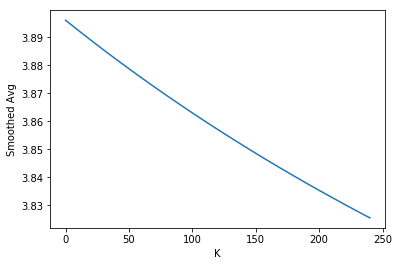

In [111]:
ks = np.arange(0, 250, 10)
s_avg = [(iid_n_ratings * iid_avg_r + k * mu) / (iid_n_ratings + k) for k in ks]
plt.plot(ks, s_avg)
plt.ylabel("Smoothed Avg")
plt.xlabel("K")

### Возьмем фильм с малым количеством рейтингов

In [112]:
ratings_per_movie = r_df.groupby("movieId").rating.count()
avg_ratings_per_movie = r_df.groupby("movieId").rating.mean()

In [113]:
ratings_per_movie[(ratings_per_movie == 20) & (avg_ratings_per_movie > 4)].head(5)

movieId
71199    20
Name: rating, dtype: int64

In [114]:
target_iid = 71199

In [115]:
iid_avg_r = r_df[r_df.movieId == target_iid].rating.mean()
iid_avg_r

4.0499999999999998

In [116]:
iid_n_ratings = r_df[r_df.movieId == target_iid].shape[0]
iid_n_ratings

20

In [117]:
m_df[m_df.index == 71199]

,title,genres
movieId,,
71199,Memories of Underdevelopment (Memorias del sub...,Drama


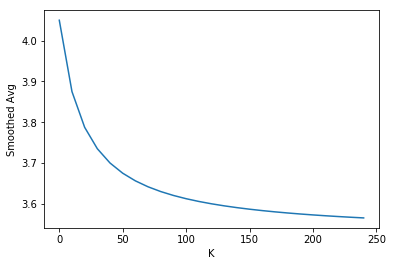

In [118]:
ks = np.arange(0, 250, 10)
s_avg = [(iid_n_ratings * iid_avg_r + k * mu) / (iid_n_ratings + k) for k in ks]
plt.plot(ks, s_avg)
plt.ylabel("Smoothed Avg")
plt.xlabel("K")

# Hacker News

In [119]:
T = np.arange(0, 72)

In [120]:
def hn_rating(p, t, gamma=1.8):
    return (p - 1) / ((t + 2) ** gamma)

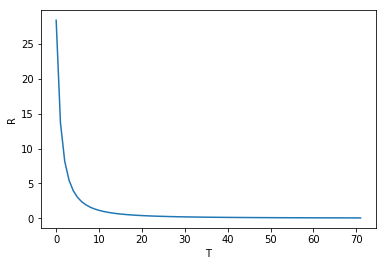

In [121]:
P = 100
R = [hn_rating(P, t) for t in T]
plt.plot(T, R)
plt.ylabel("R")
plt.xlabel("T")

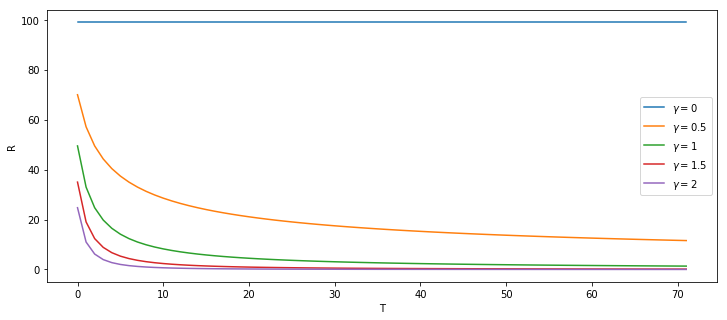

In [122]:
plt.figure(figsize=(12, 5))

P = 100
gammas = [0, 0.5, 1, 1.5, 2]
for gamma in gammas:
    R = [hn_rating(P, t, gamma) for t in T]
    plt.plot(T, R, label="$\gamma=%s$" % gamma)
    
plt.legend(loc='best')
plt.ylabel("R")
plt.xlabel("T")

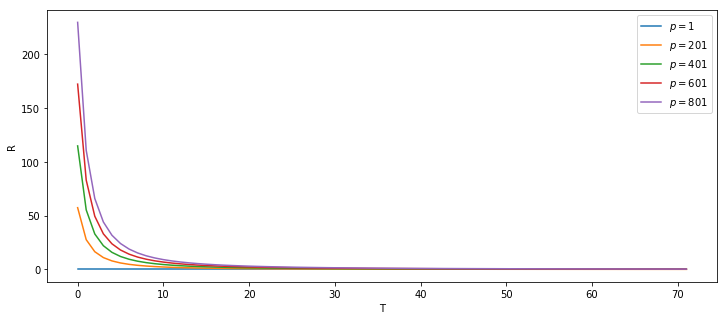

In [123]:
plt.figure(figsize=(12, 5))

Ps = np.arange(1, 1000, 200)
for p in Ps:
    R = [hn_rating(p, t) for t in T]
    plt.plot(T, R, label="$p=%s$" % p)
    
plt.legend(loc='best')
plt.ylabel("R")
plt.xlabel("T")

# Reddit

In [97]:
def reddit_rating(u, d, t):
    return np.log10(max(1, np.abs(u - d))) + np.sign(u - d) * t / 45000

In [126]:
import time
t = time.time()
t

1501764618.365526

In [129]:
SECONDS_PER_HOUR = 24 * 60 * 60
T = [t - i * SECONDS_PER_HOUR for i in range(13)]
T

[1501764618.365526,
 1501678218.365526,
 1501591818.365526,
 1501505418.365526,
 1501419018.365526,
 1501332618.365526,
 1501246218.365526,
 1501159818.365526,
 1501073418.365526,
 1500987018.365526,
 1500900618.365526,
 1500814218.365526,
 1500727818.365526]

In [130]:
u = 10
d = 1

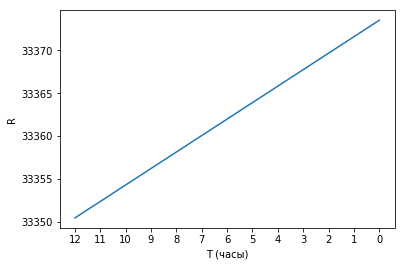

In [135]:
R = [reddit_rating(u, d, t) for t in T]
plt.plot(T, R)
plt.xticks(T, np.arange(0, 13))
plt.ylabel("R")
plt.xlabel("T (часы)")

<Container object of 1 artists>

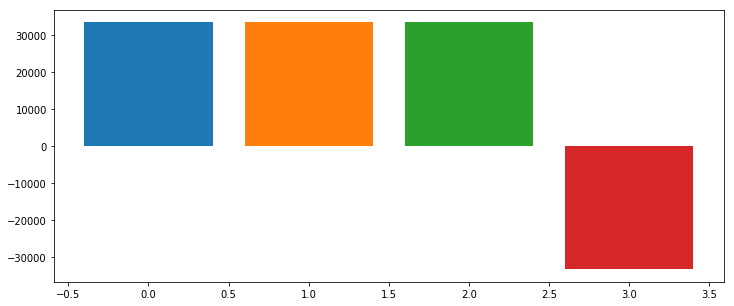

In [145]:
plt.figure(figsize=(12, 5))
plt.bar(0, reddit_rating(10, 1, t))
plt.bar(1, reddit_rating(100, 10, t))
plt.bar(2, reddit_rating(1000, 100, t))
plt.bar(3, reddit_rating(99, 100, t))